#Loading and Tidying the Data
Below I am importing the dataset and loading any packages I will need throughout the code. I also begin to look at the data using the .head() function to view the first five rows.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Loading the data
medal = '/content/drive/MyDrive/Intro to Data Science/olympics_08_medalists.csv'
medal = pd.read_csv(medal)
medal.head()
#Potential cleaning: column for gender, column for sport, name, column for gold, silver, bronze medal

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(medal.columns) ##Looking at the columns currently in data so know which events to group together.

Index(['medalist_name', 'male_archery', 'female_archery', 'male_athletics',
       'female_athletics', 'male_badminton', 'female_badminton',
       'male_baseball', 'male_basketball', 'female_basketball', 'male_boxing',
       'male_canoeing and kayaking', 'female_canoeing and kayaking',
       'male_road bicycle racing', 'female_road bicycle racing',
       'male_track cycling', 'female_track cycling', 'male_mountain biking',
       'female_mountain biking', 'male_bmx', 'female_bmx', 'male_diving',
       'female_diving', 'female_equestrian sport', 'male_equestrian sport',
       'male_fencing', 'female_fencing', 'male_field hockey',
       'female_field hockey', 'male_association football',
       'female_association football', 'male_artistic gymnastics',
       'female_artistic gymnastics', 'female_rhythmic gymnastics',
       'male_trampoline gymnastics', 'female_trampoline gymnastics',
       'male_handball', 'female_handball', 'male_judo', 'female_judo',
       'male_modern penta

Below, I begin the data cleaning process. First, I use the melt function to change the dataset from a wide to long format. I make it so there is a column for events, rather than a separate column for each event. This is discussed in the pandas cheatsheet, which says that the .melt function can be used to "Gather columns into rows." This helps adhere to the tidy data principles because it changes the dataset so that the variable event, is now in one column, called event. Therefore transforming this variable so that "Each variable is in its own column."

In [8]:
##Data Cleaning and Tidying
#melting the dataframe. After melting, the events and medals are both their own columns, rather than having the medals recorded under the numerous event columns present in the original dataset.
medal_melt = pd.melt(medal,
        id_vars = ['medalist_name'],#column want to keep as observations
        value_vars = ['male_archery', 'female_archery', 'male_athletics',
       'female_athletics', 'male_badminton', 'female_badminton',
       'male_baseball', 'male_basketball', 'female_basketball', 'male_boxing',
       'male_canoeing and kayaking', 'female_canoeing and kayaking',
       'male_road bicycle racing', 'female_road bicycle racing',
       'male_track cycling', 'female_track cycling', 'male_mountain biking',
       'female_mountain biking', 'male_bmx', 'female_bmx', 'male_diving',
       'female_diving', 'female_equestrian sport', 'male_equestrian sport',
       'male_fencing', 'female_fencing', 'male_field hockey',
       'female_field hockey', 'male_association football',
       'female_association football', 'male_artistic gymnastics',
       'female_artistic gymnastics', 'female_rhythmic gymnastics',
       'male_trampoline gymnastics', 'female_trampoline gymnastics',
       'male_handball', 'female_handball', 'male_judo', 'female_judo',
       'male_modern pentathlon', 'female_modern pentathlon', 'male_rowing',
       'female_rowing', 'male_sailing', 'female_sailing',
       'male_shooting sport', 'female_shooting sport', 'female_softball',
       'male_swimming', 'female_swimming', 'female_synchronized swimming',
       'male_table tennis', 'female_table tennis', 'male_taekwondo',
       'female_taekwondo', 'male_tennis', 'female_tennis', 'male_triathlon',
       'female_triathlon', 'male_beach volleyball', 'female_beach volleyball',
       'male_volleyball', 'female_volleyball', 'male_water polo',
       'female_water polo', 'male_weightlifting', 'female_weightlifting',
       'male_freestyle wrestling', 'female_freestyle wrestling',
       'male_greco-roman wrestling'], #what variables want to convert
        var_name = "event",
        value_name = "medal") #name want to give new shifted columns
medal_melt

,medalist_name,event,medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN
...,...,...,...
131245,Éver Banega,male_greco-roman wrestling,NaN
131246,Ólafur Stefánsson,male_greco-roman wrestling,NaN
131247,Óscar Brayson,male_greco-roman wrestling,NaN
131248,Łukasz Pawłowski,male_greco-roman wrestling,NaN


Next, I separated gender and event so that each is represented in its own column using the .split function to separate the two, noting that the split should be done at the _. This helps to adhere to the tidy data principle of each variable having its own column.

In [9]:
medal_melt[['gender', 'sport']] = medal_melt['event'].str.split('_', expand=True)
medal_melt.head()

,medalist_name,event,medal,gender,sport
0,Aaron Armstrong,male_archery,NaN,male,archery
1,Aaron Peirsol,male_archery,NaN,male,archery
2,Abdullo Tangriev,male_archery,NaN,male,archery
3,Abeer Abdelrahman,male_archery,NaN,male,archery
4,Abhinav,male_archery,NaN,male,archery


- Here, I alter the event column so that it no longer includes gender using the .replace function since gender is now its own column. This helps clean up the values and remove any unwanted information, in this case the gender.
- I also continue to tidy the data by dropping the na values using dropna, that way there is not a row for every event for every person, but instead one row which is only for the event the person actually competed in.

In [10]:

medal_melt["event"] = medal_melt["event"].str.replace("male_", "")
medal_melt["event"] = medal_melt["event"].str.replace("female_", "")
medal_melt.head()
medal_melt = medal_melt.dropna(subset=['medal'])
medal_melt

,medalist_name,event,medal,gender,sport
177,Bair Badënov,archery,bronze,male,archery
676,Ilario Di Buò,archery,silver,male,archery
682,Im Dong-hyun,archery,gold,male,archery
760,Jiang Lin,archery,bronze,male,archery
920,Lee Chang-hwan,archery,gold,male,archery
...,...,...,...,...,...
130932,Steeve Guénot,greco-roman wrestling,gold,male,greco-roman wrestling
131159,Yannick Szczepaniak,greco-roman wrestling,bronze,male,greco-roman wrestling
131162,Yavor Yanakiev,greco-roman wrestling,bronze,male,greco-roman wrestling
131200,Yury Patrikeyev,greco-roman wrestling,bronze,male,greco-roman wrestling


In [11]:
medal_melt["medal"].unique() #Looking to see how medals are categorized. Since just by type, one column seems cleaner than making separate columns for gold, silver and bronze

array(['bronze', 'silver', 'gold'], dtype=object)

Below, I rename the column medalist_name to name so that it is simpler and cleaner.

In [12]:
medal_melt = medal_melt.rename(columns={'medalist_name': 'name'}) #Rename medalist_name to name so it is simpler, and shorter name
medal_melt

,name,event,medal,gender,sport
177,Bair Badënov,archery,bronze,male,archery
676,Ilario Di Buò,archery,silver,male,archery
682,Im Dong-hyun,archery,gold,male,archery
760,Jiang Lin,archery,bronze,male,archery
920,Lee Chang-hwan,archery,gold,male,archery
...,...,...,...,...,...
130932,Steeve Guénot,greco-roman wrestling,gold,male,greco-roman wrestling
131159,Yannick Szczepaniak,greco-roman wrestling,bronze,male,greco-roman wrestling
131162,Yavor Yanakiev,greco-roman wrestling,bronze,male,greco-roman wrestling
131200,Yury Patrikeyev,greco-roman wrestling,bronze,male,greco-roman wrestling


Finally, I removed the column "event" because event contained the same values as the sport column. I then renamed the sport colument event because I thought event better described the values since they are Olympic events.

In [13]:
medal_melt = medal_melt.drop('event', axis=1) #used drop function to remove event column
medal_melt
medal_melt = medal_melt.rename(columns={'sport': 'event'})

In [14]:
medal_melt.describe() #Finding information about the cleaned data

,name,medal,gender,event
count,1875,1875,1875,1875
unique,1875,3,2,38
top,Zoltán Fodor,bronze,male,athletics
freq,1,668,1032,166


In [15]:
medal_melt.dtypes #Finding information about the data types now

,0
name,object
medal,object
gender,object
event,object


After this cleaning, it can be seen that every observation (person in the Olypmics included in this data set), has their own row, and only one row. Each variable has its own column. Making this a tidy dataset, and allowing it to be used for the visualizations made below.

# Visualizations:
- The first visualization shows a count of the medals. This is helpful because it shows that there are the most bronze medals in this dataset, followed by silver, and the fewest number of gold medals.


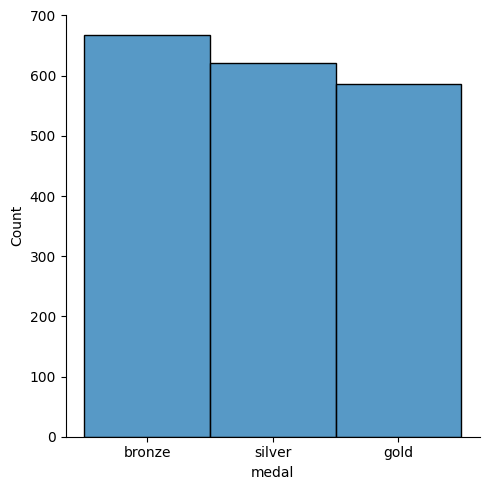

In [16]:
#Data Visualization
sns.displot(medal_melt["medal"])
#Shows that most medals recorded in this dataset are Bronze, then silver, then gold.



I recognized that it would be too crowded to create visulizations containing all the events. In order to address this problem, I created 3 subsets of the data to create groups of events:
- Group 1: Events not involving water or balls.
- Group 2: Events not involving water, but do use balls / something similar to a ball like a birdie.
- Group 3: Events involving water.

In [17]:
#Subsets of Sports
land = ['archery', 'athletics' , 'boxing', 'bicycle racing', 'track cycling', 'mountain biking', 'bmx', 'equestrian sport', 'fencing', 'artistic gymnastics', 'rhythmic gymnastics', 'trampoline gymnastics' , 'judo', 'shooting sport', 'taekwondo', 'weightlifting', 'freestyle wrestling', 'greco-roman wrestling']
subset_land= medal_melt[medal_melt['event'].isin(land)]
ball = ['badminton', 'baseball' ,'basketball' , 'field hockey', 'association football', 'handball', 'softball' , 'table tennis' ,  'tennis', 'beach volleyball' , 'volleyball']
subset_ball= medal_melt[medal_melt['event'].isin(ball)]
water = ['canoeing and kayaking', 'diving', 'modern pentathlon', 'rowing', 'sailing', 'swimming', 'synchronized swimming', 'triathlon', 'water polo']
subset_water = medal_melt[medal_melt['event'].isin(water)]

Next, I created visualizations of the 3 groups. The first three visualizations show the subsets by the count of medals within each category, showing a differentation between the number of bronze, silver, and gold medals won in each event cateogry.

In [18]:
#making palette for this visualization

colors = ['red', 'silver', 'yellow']

Text(0.5, 1.0, 'Number of Medals Won in Each Land Event')

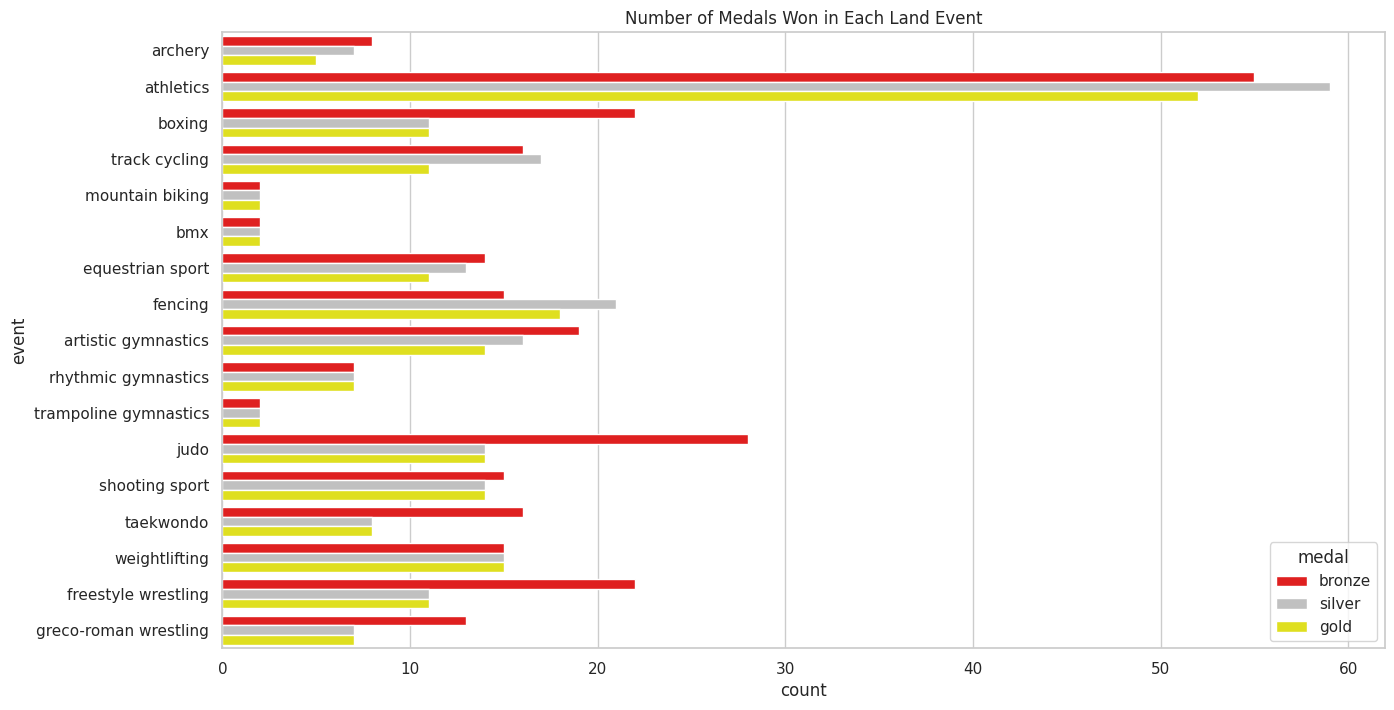

In [19]:
#For land sports with no ball
sns.set_theme(style="whitegrid")

#size
plt.figure(figsize=(15, 8))

#barplot
sns.countplot(y="event", hue="medal", data= subset_land, palette= colors)
plt.title('Number of Medals Won in Each Land Event')

Text(0.5, 1.0, 'Number of Medals Won in Each Ball Event')

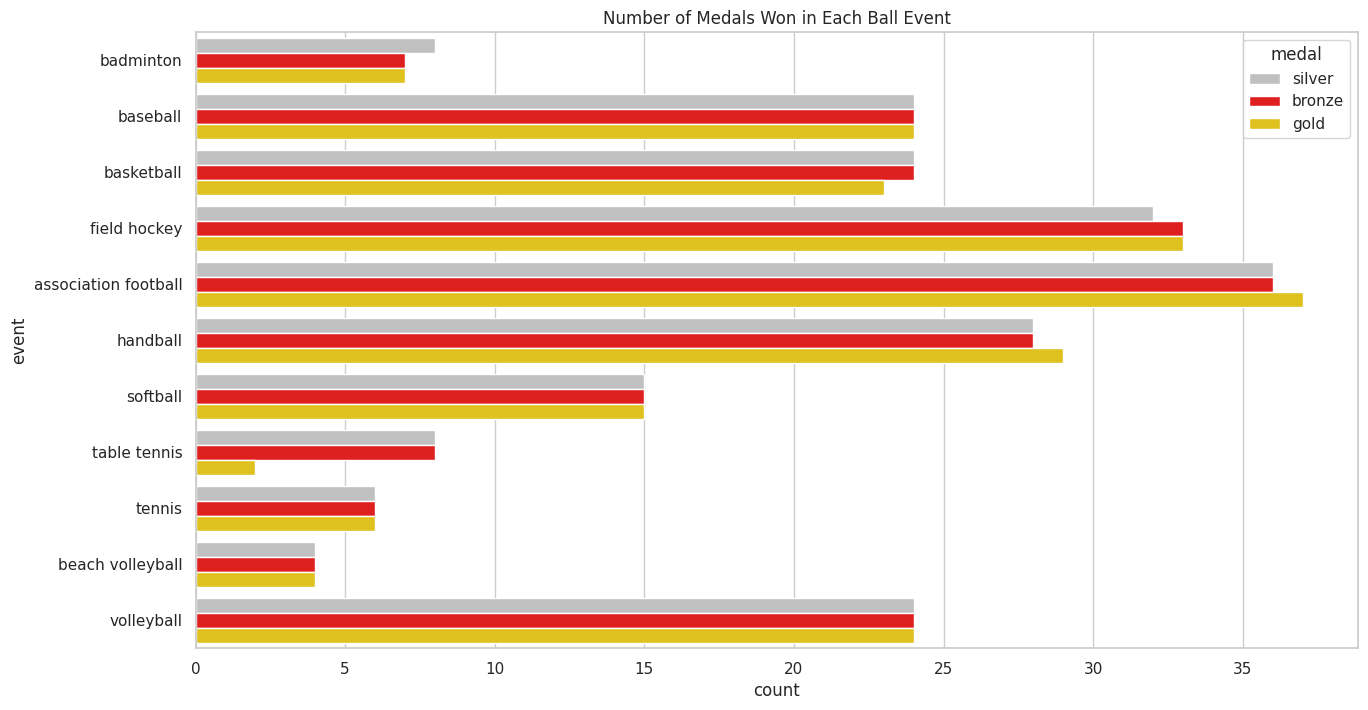

In [20]:
#Ball Sports
colors = ['silver', 'red', 'gold'] #colors for this visualization

sns.set_theme(style="whitegrid")


# size
plt.figure(figsize=(15, 8))

#barplot
sns.countplot(y="event", hue="medal", data= subset_ball, palette= colors)
plt.title('Number of Medals Won in Each Ball Event')

Text(0.5, 1.0, 'Number of Medals Won in Each Water Event')

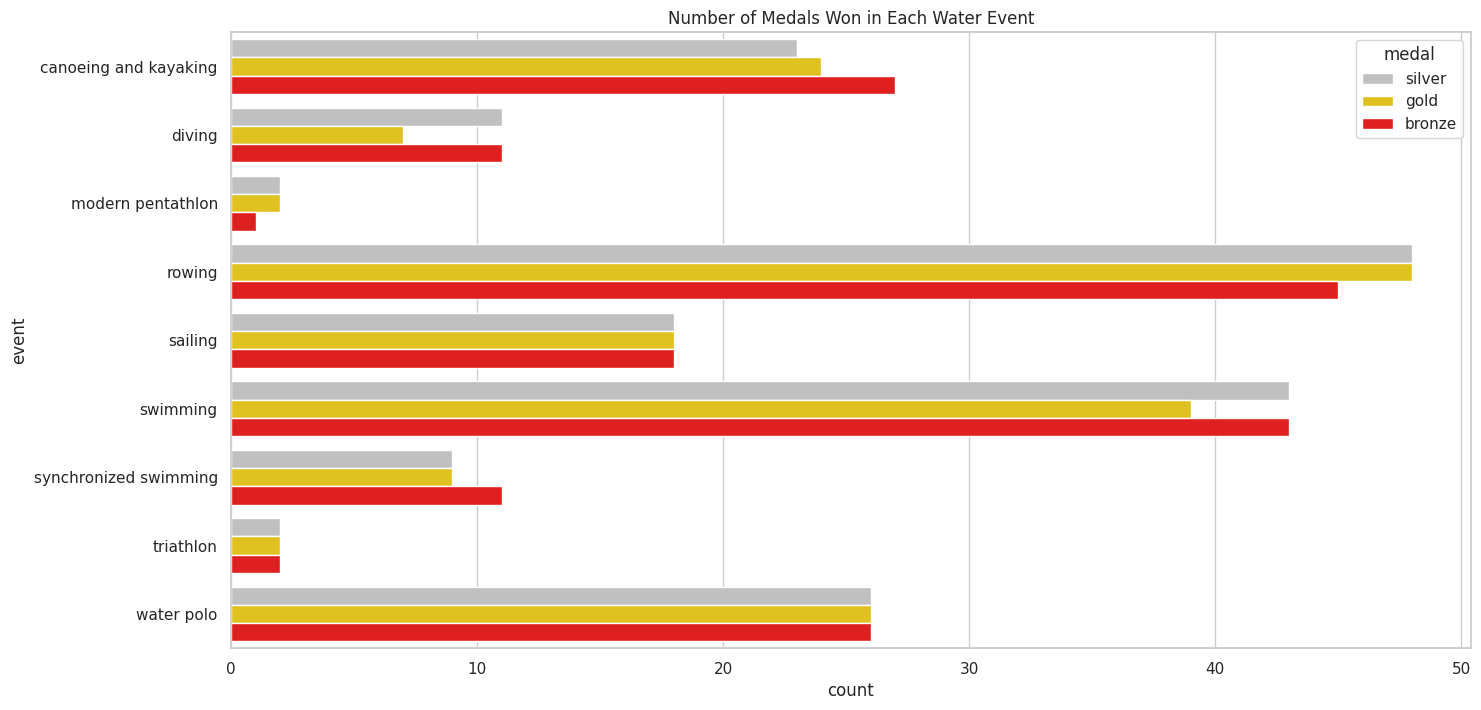

In [21]:
#Water Sports
colors = ['silver', 'gold', 'red'] #colors for this visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.countplot(y="event", hue="medal", data= subset_water, palette = colors)
plt.title('Number of Medals Won in Each Water Event')

Next, I looked at the gender breakdown within the same event subsets. The visualizations and the code used to create them are shown below.

In [22]:
color = ['blue', 'pink'] #making my color palette for these visualizations


Text(0.5, 1.0, 'Number of Female and Male Athletes in Each Water Event')

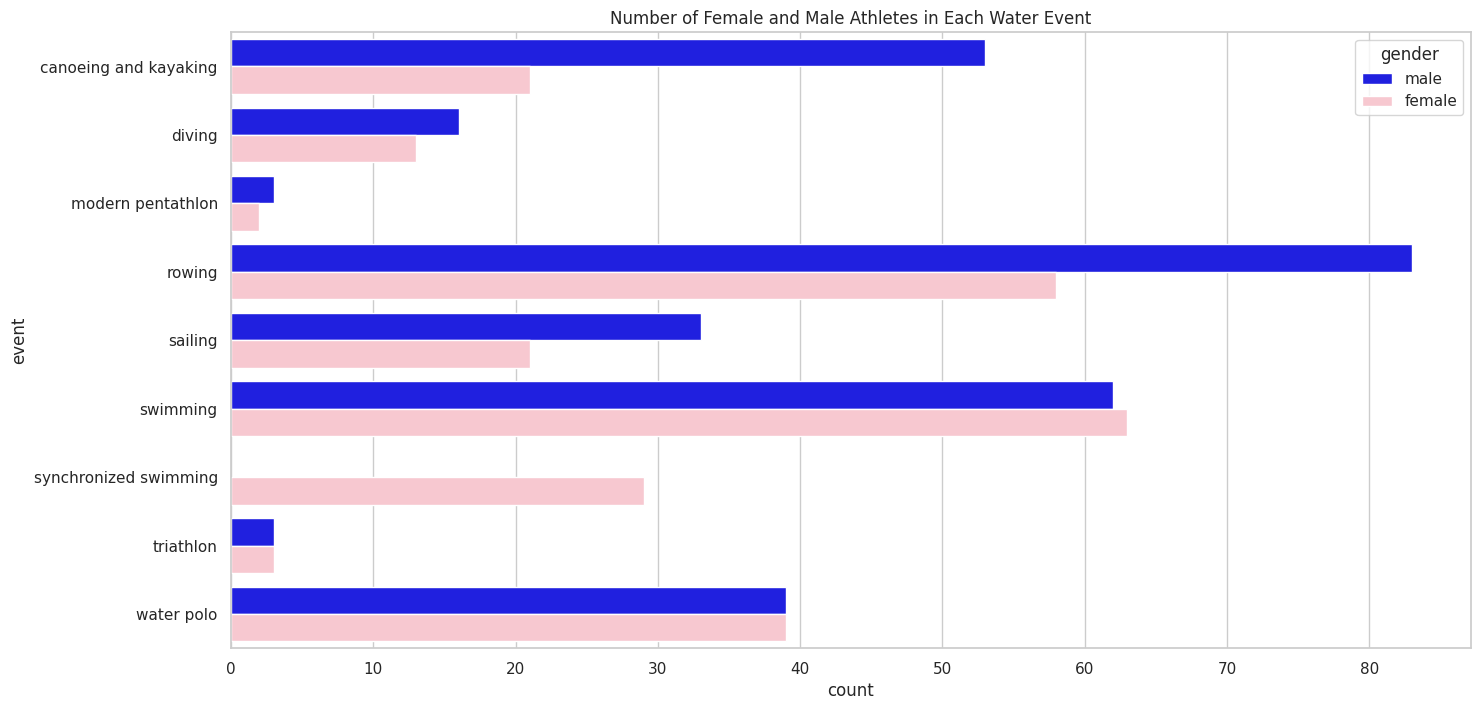

In [24]:
#Gender in Water Sports
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
sns.countplot(y="event", hue="gender", data= subset_water, palette= color)
plt.title('Number of Female and Male Athletes in Each Water Event')

Text(0.5, 1.0, 'Number of Female and Male Athletes in Each Land Event')

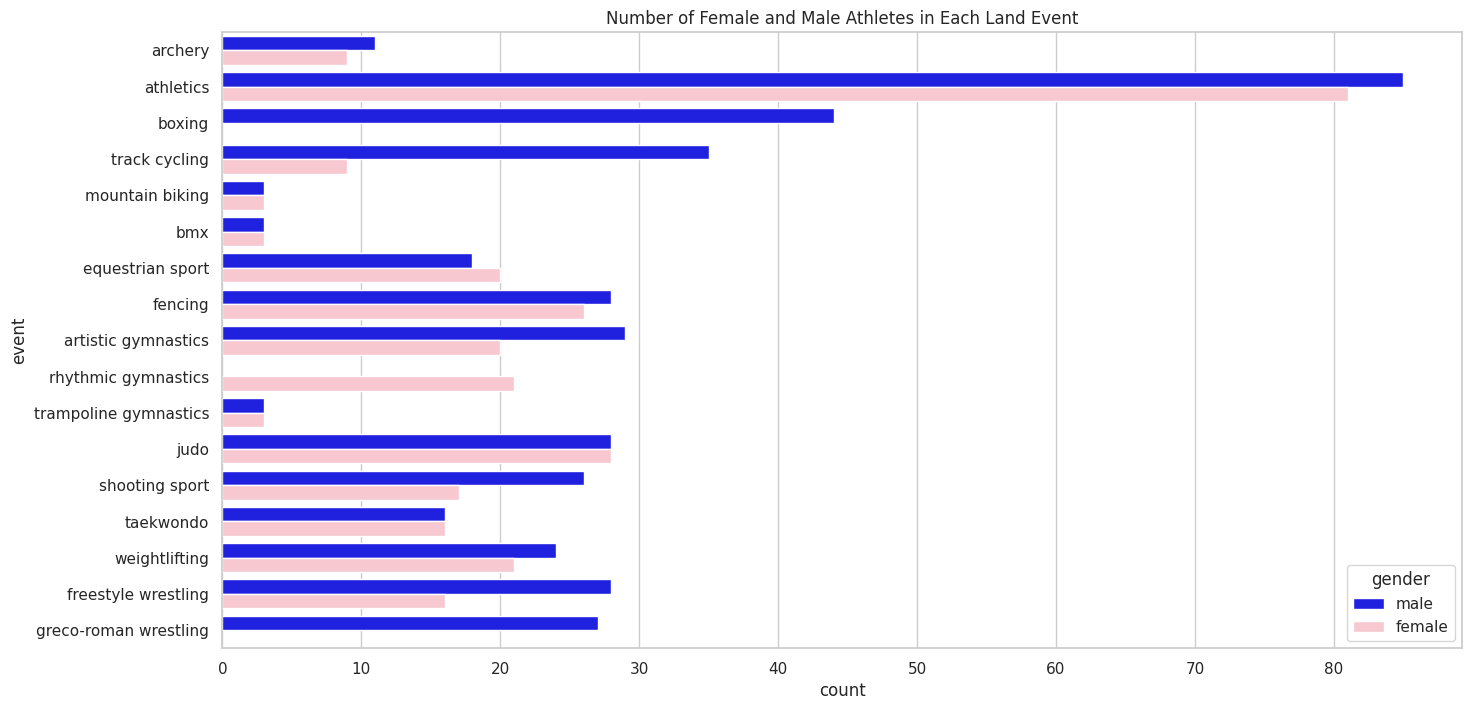

In [25]:
#Gender land sports not using balls
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
sns.countplot(y="event", hue="gender", data= subset_land, palette= color)
plt.title('Number of Female and Male Athletes in Each Land Event')

Text(0.5, 1.0, 'Number of Female and Male Athletes in Each Ball Event')

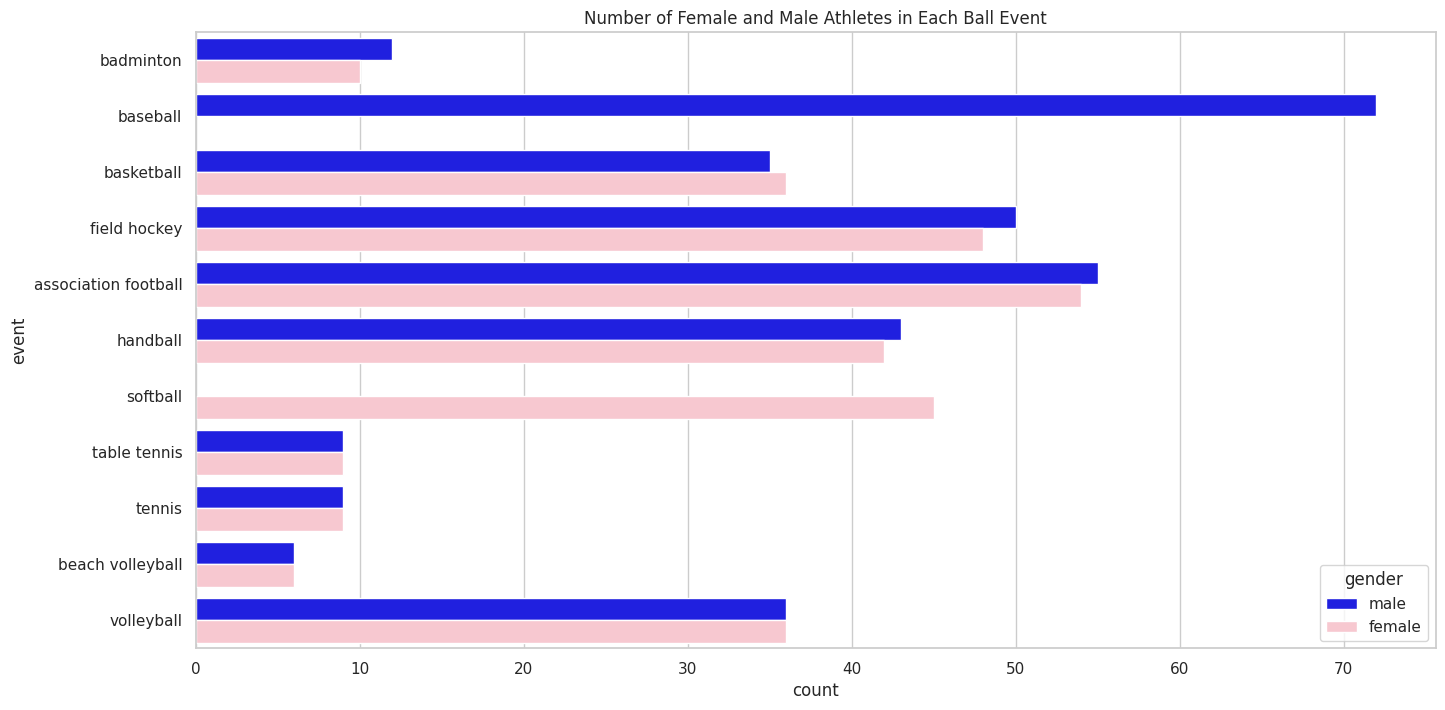

In [26]:
#Land sports with balls
plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")
sns.countplot(y="event", hue="gender", data= subset_ball, palette= color)
plt.title('Number of Female and Male Athletes in Each Ball Event')

#Pivot Table
Finally, I ran aggregation functions using pivot_table to find the count of medals for each gender in each event. I tried doing so both in a long and wide format, to compare the pros and cons of each version. Ultimately, I think the long version is easier to understand.

In [27]:
#Pivot-Table: Run at least one aggregation function on the tidy data.
pd.pivot_table(medal_melt,
               index = "event", #want to keep event as rows
               columns = "gender",
               values = "medal",
               aggfunc = "count")

gender,female,male
event,,
archery,9.0,11.0
artistic gymnastics,20.0,29.0
association football,54.0,55.0
athletics,81.0,85.0
badminton,10.0,12.0
baseball,NaN,72.0
basketball,36.0,35.0
beach volleyball,6.0,6.0
bmx,3.0,3.0


In [28]:
pd.pivot_table(medal_melt,
               index = "gender", #want to keep gender as rows
               columns = "event",
               values = "medal",
               aggfunc = "count")

event,archery,artistic gymnastics,association football,athletics,badminton,baseball,basketball,beach volleyball,bmx,boxing,...,synchronized swimming,table tennis,taekwondo,tennis,track cycling,trampoline gymnastics,triathlon,volleyball,water polo,weightlifting
gender,,,,,,,,,,,,,,,,,,,,,
female,9.0,20.0,54.0,81.0,10.0,NaN,36.0,6.0,3.0,NaN,...,29.0,9.0,16.0,9.0,9.0,3.0,3.0,36.0,39.0,21.0
male,11.0,29.0,55.0,85.0,12.0,72.0,35.0,6.0,3.0,44.0,...,NaN,9.0,16.0,9.0,35.0,3.0,3.0,36.0,39.0,24.0
